In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sbn
import sklearn as skl
import statsmodels as sm

# EDA and Feature Engineering

In [2]:
print("Here, 1st of all I had load training dataset and examine it. I had check that there was any duplicate data exist or not. If exist then I will drop the duplicates.\n")
trainingset=pd.read_csv("MaterialStrength_Train.csv")
# keep=last means it will remove all duplicate except last one
duplicate = trainingset[trainingset.duplicated(keep = 'last')]
print("Number of duplicate", len(duplicate))
trainingset = pd.DataFrame(trainingset)
ntrainingset=trainingset.drop_duplicates()
# drop=True is to reset the index
ntrainingset=ntrainingset.reset_index(drop=True)
print("Here, number of duplicate data is 24. So I had drop all the duplicates.")
print("After droping duplicates: ")
display(ntrainingset)

Here, 1st of all I had load training dataset and examine it. I had check that there was any duplicate data exist or not. If exist then I will drop the duplicates.

Number of duplicate 24
Here, number of duplicate data is 24. So I had drop all the duplicates.
After droping duplicates: 


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
771,525.0,0.0,0.0,189.0,0.0,1125.0,613.0,180,61.92
772,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,90,47.22
773,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,180,51.04
774,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,270,55.16


In [3]:
print("Here, I had checked number of null values in this training dataset.\n")
print(ntrainingset.info())
print("\nFrom the above trainingset.info(), we come to know that our training dataset does not contain any null values.")

Here, I had checked number of null values in this training dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              776 non-null    float64
 1   blast_furnace_slag  776 non-null    float64
 2   fly_ash             776 non-null    float64
 3   water               776 non-null    float64
 4   superplasticizer    776 non-null    float64
 5   coarse_aggregate    776 non-null    float64
 6   fine_aggregate      776 non-null    float64
 7   age                 776 non-null    int64  
 8   Material Strength   776 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.7 KB
None

From the above trainingset.info(), we come to know that our training dataset does not contain any null values.


In [4]:
print("Here, I had check the outliers. To get the idea of outliers, I have compared the value of mean and max of each attribute.\n")
print(ntrainingset.describe())
print("\nI observed that the gap between the max and mean of attribute age, superplasticizer and blast_furnace_slag is high. So majority outliers is present in these three attributes.")

Here, I had check the outliers. To get the idea of outliers, I have compared the value of mean and max of each attribute.

           cement  blast_furnace_slag     fly_ash       water  \
count  776.000000          776.000000  776.000000  776.000000   
mean   289.562500           65.136985   49.289948  180.386340   
std    103.764355           85.653577   61.897938   22.232729   
min    102.000000            0.000000    0.000000  121.800000   
25%    212.000000            0.000000    0.000000  162.000000   
50%    275.000000           13.600000    0.000000  185.700000   
75%    365.450000          128.125000  118.225000  192.000000   
max    540.000000          359.400000  174.700000  228.000000   

       superplasticizer  coarse_aggregate  fine_aggregate          age  \
count        776.000000        776.000000       776.000000  776.000000   
mean           5.447680        988.008634       777.434021   50.050258   
std            6.185539         72.079540        82.966435   69.93151

In [5]:
print("Here I speculated that in atleast 15 iteration, all outliers will be removed.")
for itr in range(15):
    for col in ['age','superplasticizer','blast_furnace_slag']:
        # below code means three times standard deviation from mean
        # this is common technique to handle outliers
        upper_limit = ntrainingset[col].mean() + 3*ntrainingset[col].std()
        lower_limit = ntrainingset[col].mean() - 3*ntrainingset[col].std()
        ntrainingset[col] = np.where(ntrainingset[col] > upper_limit,upper_limit,np.where(ntrainingset[col] < lower_limit,lower_limit,ntrainingset[col]))

Here I speculated that in atleast 15 iteration, all outliers will be removed.


In [6]:
print("After removing the outliers, now we can see that the gap between the mean and max value has reduce in blast_furnace_slag, superplasticizer and age.\n")
print(ntrainingset.describe())

After removing the outliers, now we can see that the gap between the mean and max value has reduce in blast_furnace_slag, superplasticizer and age.

           cement  blast_furnace_slag     fly_ash       water  \
count  776.000000          776.000000  776.000000  776.000000   
mean   289.562500           64.980791   49.289948  180.386340   
std    103.764355           85.155897   61.897938   22.232729   
min    102.000000            0.000000    0.000000  121.800000   
25%    212.000000            0.000000    0.000000  162.000000   
50%    275.000000           13.600000    0.000000  185.700000   
75%    365.450000          128.125000  118.225000  192.000000   
max    540.000000          320.448483  174.700000  228.000000   

       superplasticizer  coarse_aggregate  fine_aggregate          age  \
count        776.000000        776.000000       776.000000  776.000000   
mean           5.349705        988.008634       777.434021   44.827875   
std            5.838344         72.079540  

In [7]:
print("Here I have done standarization for preprocessing then plotted correlation with heat map.")
from sklearn import preprocessing
colmns=ntrainingset.columns
ntrainingset=pd.DataFrame(preprocessing.scale(ntrainingset),columns=colmns)
correlation = ntrainingset.corr()
correlation.style.background_gradient(cmap = 'BrBG')

Here I have done standarization for preprocessing then plotted correlation with heat map.


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
cement,1.000000,-0.240232,-0.330568,-0.025719,0.189136,-0.253011,-0.316229,0.049803,0.460156
blast_furnace_slag,-0.240232,1.000000,-0.402008,0.140877,-0.049563,-0.249917,-0.301008,-0.021917,0.089114
fly_ash,-0.330568,-0.402008,1.000000,-0.433831,0.409238,0.168026,0.194679,-0.123551,0.017349
water,-0.025719,0.140877,-0.433831,1.000000,-0.777027,-0.142042,-0.459311,0.303290,-0.278982
superplasticizer,0.189136,-0.049563,0.409238,-0.777027,1.000000,-0.161040,0.276004,-0.156256,0.453173
coarse_aggregate,-0.253011,-0.249917,0.168026,-0.142042,-0.161040,1.000000,-0.188382,-0.060804,-0.186456
fine_aggregate,-0.316229,-0.301008,0.194679,-0.459311,0.276004,-0.188382,1.000000,-0.181656,-0.208380
age,0.049803,-0.021917,-0.123551,0.303290,-0.156256,-0.060804,-0.181656,1.000000,0.435275
Material Strength,0.460156,0.089114,0.017349,-0.278982,0.453173,-0.186456,-0.208380,0.435275,1.000000


In the above picture, positive values shows they are directly correlated and negative values show that they are indirectly correlated.

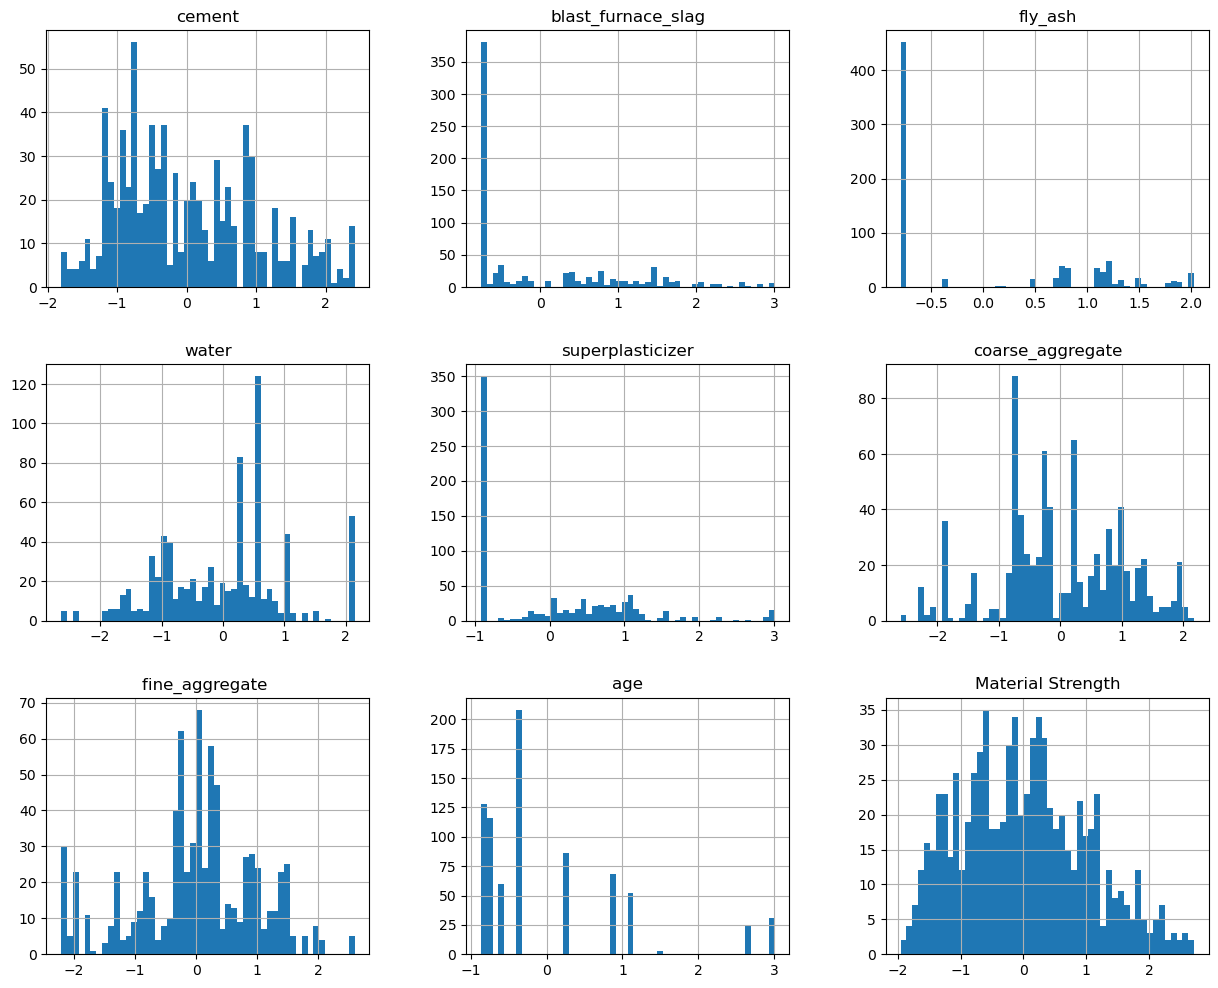

Cement, Coarse_aggregate and fine_aggregate approximately have normal distribution
Blast_Furnace_Slag, Fly_ash, Superplasticizer and age are right skewed.
Water is approximately left skewed.
Material Strength have normal distribution.


In [8]:
ntrainingset.hist(bins=50, figsize=(15,12))
mpl.pyplot.show()
print("Cement, Coarse_aggregate and fine_aggregate approximately have normal distribution")
print("Blast_Furnace_Slag, Fly_ash, Superplasticizer and age are right skewed.")
print("Water is approximately left skewed.")
print("Material Strength have normal distribution.")

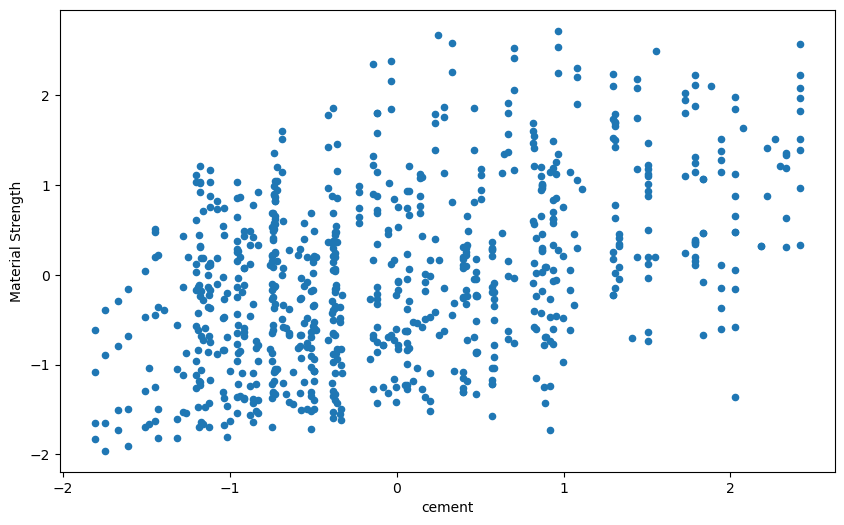

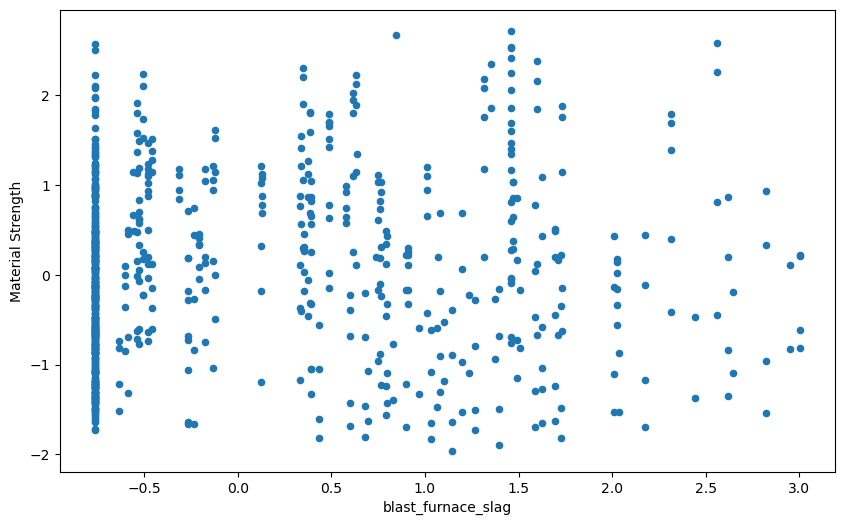

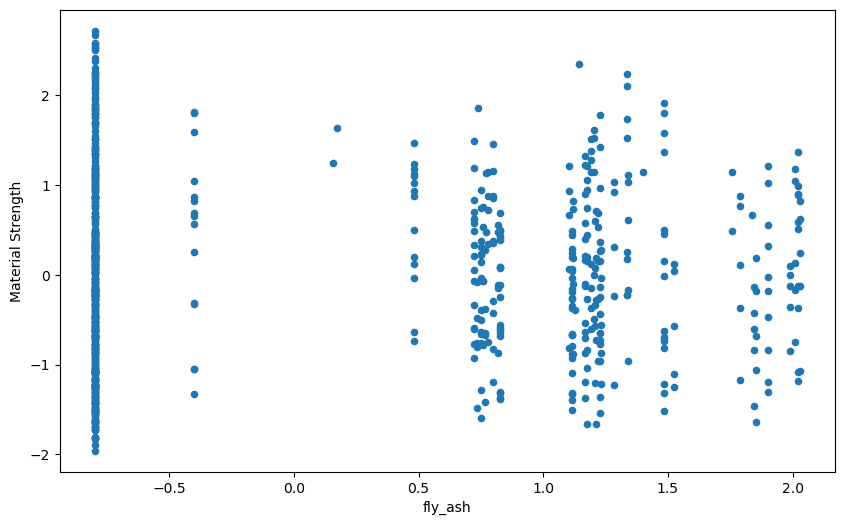

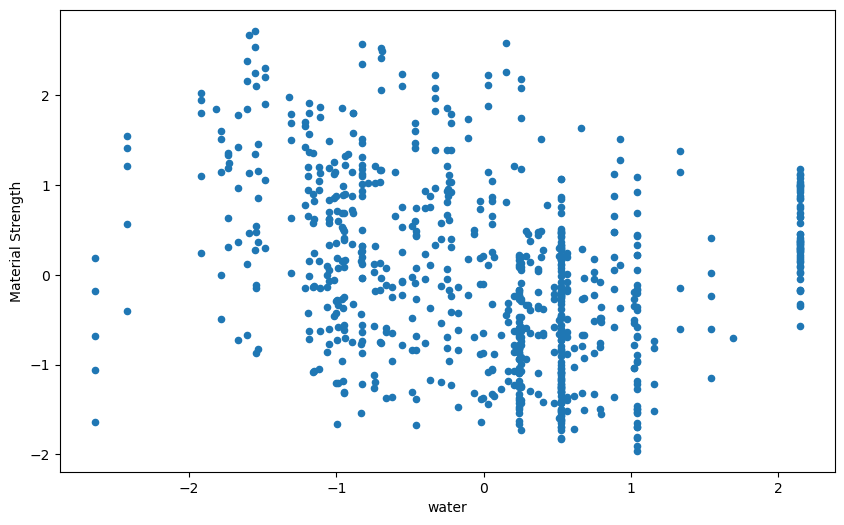

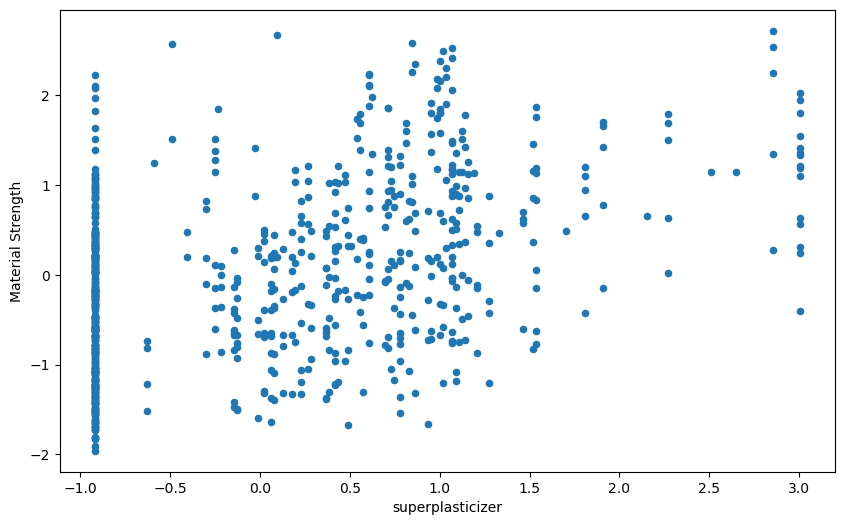

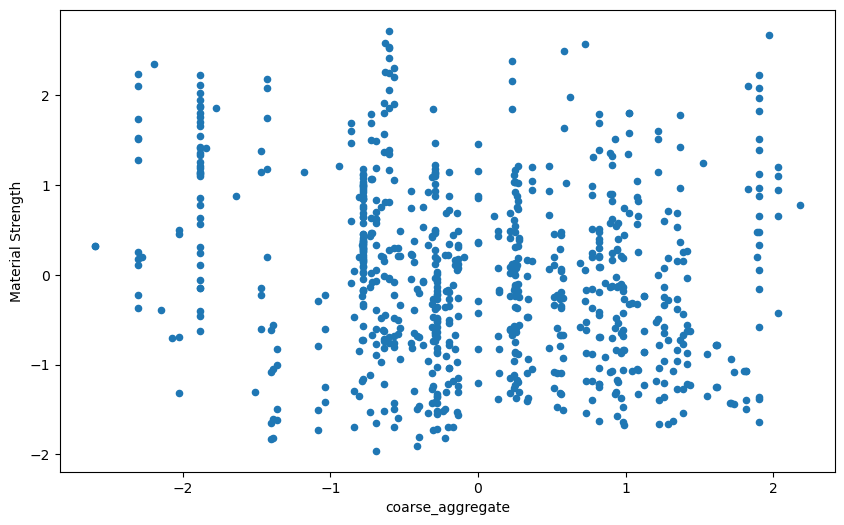

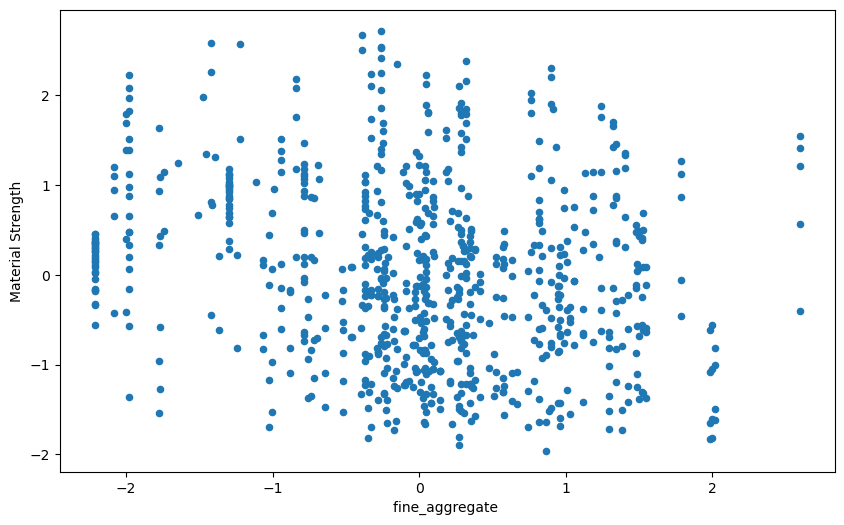

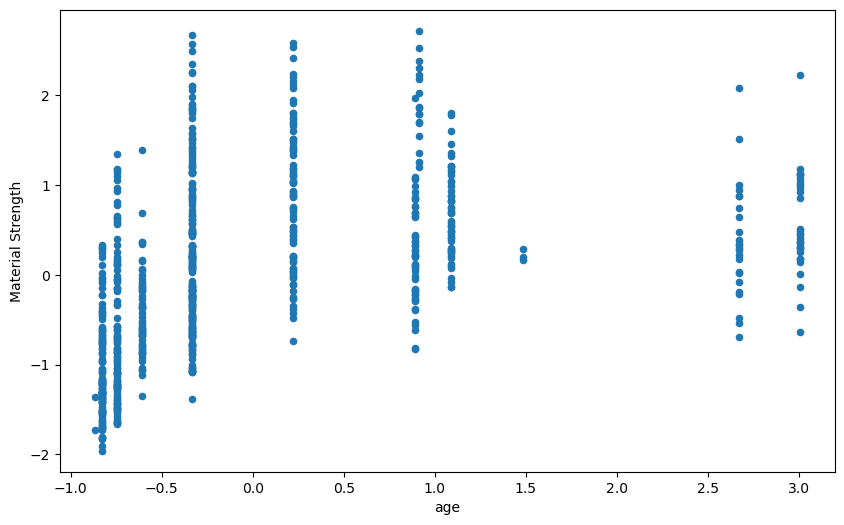


Scatterplot between cement and material strength shows n approximately linear relation.
Scatterplot between blast_furnace_slag and material strength are concentrated around the mean.
Scatterplot between fly_ash and material strength is such that a lot of ppoints are on the right side of the plot.
Scatterplot between water and material strength, superplpasticizer and material strength, coarse_aggregate and material strength and fine aggregate and material strength are ceterly concentrated in the graph.
Scatterplot between age and material strength is continuous on specific interval and discontinuous overall.


In [9]:
for col in ntrainingset.columns[:-1]:
    ntrainingset.plot(kind="scatter", x=col, y="Material Strength", figsize=(10, 6))
    mpl.pyplot.show()
print("\nScatterplot between cement and material strength shows n approximately linear relation.")
print("Scatterplot between blast_furnace_slag and material strength are concentrated around the mean.")
print("Scatterplot between fly_ash and material strength is such that a lot of ppoints are on the right side of the plot.")
print("Scatterplot between water and material strength, superplpasticizer and material strength, coarse_aggregate and material strength and fine aggregate and material strength are ceterly concentrated in the graph.")
print("Scatterplot between age and material strength is continuous on specific interval and discontinuous overall.")

In [10]:
from sklearn.model_selection import KFold
X = np.array(ntrainingset.loc[ : , ntrainingset.columns!='Material Strength'])
y = np.array(ntrainingset['Material Strength'])
f = KFold(n_splits=5)
f.get_n_splits(X)
print("Here I had splitted the training dataset into 5 equal parts for cross-validation.")

Here I had splitted the training dataset into 5 equal parts for cross-validation.


# Exact Solution

In [11]:
n_splits = 5
f = KFold(n_splits=n_splits, shuffle=True, random_state=42)
weights_normal_eq = []
weights_pseudo_inv = []
equations = []
for train_index, test_index in f.split(ntrainingset):
    train_set = ntrainingset.iloc[train_index]
    test_set = ntrainingset.iloc[test_index]
    A_train = np.c_[np.ones((train_set.shape[0], 1)), train_set.loc[:, train_set.columns != 'Material Strength']]
    x_train = np.dot(A_train.T, A_train)
    y_train = np.linalg.inv(x_train)
    z_train = np.linalg.pinv(A_train)
    w_train_normal_eq = np.dot(np.dot(y_train, A_train.T), train_set['Material Strength'].to_numpy())
    w_train_pseudo_inv = np.dot(z_train, train_set['Material Strength'].to_numpy())
    weights_normal_eq.append(w_train_normal_eq)
    weights_pseudo_inv.append(w_train_pseudo_inv)
    colmns = train_set.columns[train_set.columns != 'Material Strength'].tolist()
    colmns.insert(0, 1)
    equation = ' + '.join([f'{w_train_normal_eq[i]} * {colmns[i]}' for i in range(len(colmns))])
    equations.append(equation)
mean_weights_normal_eq = np.mean(weights_normal_eq, axis=0)
mean_weights_pseudo_inv = np.mean(weights_pseudo_inv, axis=0)
mean_equation = ' + '.join([f'{mean_weights_normal_eq[i]} * {colmns[i]}' for i in range(len(colmns))])
print("Mean value of x cap using normal equation: ")
print(mean_weights_normal_eq)
print("\nMean value of x cap using Pseudo-inverse: ")
print(mean_weights_pseudo_inv)
print("\nEquation for the response variable and its interpretation is: ")
print(mean_equation)
print("\nThe mean value of x cap using normal equation and pseudo-inverse are same. This shows that implementation are consistent with each other.")
print("\nIn the equation, positive coefficients shows that they positively correlated and negative coefficient shows that it is negatively correlated.")

Mean value of x cap using normal equation: 
[ 1.65250186e-04  6.05535539e-01  4.15655713e-01  2.75989000e-01
 -2.36904647e-01  1.52953078e-01  5.17772053e-02  1.29050035e-02
  5.49538803e-01]

Mean value of x cap using Pseudo-inverse: 
[ 1.65250186e-04  6.05535539e-01  4.15655713e-01  2.75989000e-01
 -2.36904647e-01  1.52953078e-01  5.17772053e-02  1.29050035e-02
  5.49538803e-01]

Equation for the response variable and its interpretation is: 
0.00016525018620003467 * 1 + 0.6055355388423447 * cement + 0.41565571329639395 * blast_furnace_slag + 0.2759889995213144 * fly_ash + -0.23690464728516697 * water + 0.1529530782466219 * superplasticizer + 0.05177720530102743 * coarse_aggregate + 0.012905003501476562 * fine_aggregate  + 0.5495388027578163 * age

The mean value of x cap using normal equation and pseudo-inverse are same. This shows that implementation are consistent with each other.

In the equation, positive coefficients shows that they positively correlated and negative coefficient

# Statistical Analysis

In [12]:
import statsmodels.api as smi
from sklearn.model_selection import KFold
X = ntrainingset.loc[:, ntrainingset.columns != 'Material Strength']
y = ntrainingset['Material Strength']
X = smi.add_constant(X)
folds = 5
f = KFold(n_splits=folds, shuffle=True, random_state=42)
results = []
for train_index, val_index in f.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    model = smi.OLS(y_train, X_train)
    result = model.fit()
    results.append(result)
for idx, result in enumerate(results):
    print(f"Fold {idx + 1} Summary:")
    print(result.summary())
    print("=" * 80)
print("R-squared is a statistical measure that indicates how much of the variation of a dependent variable is explained by an independent variable in a regression model.")
print("Adjusted R-squared is a modified version of R-squared. Adjusted R2 is a corrected goodness-of-fit (model accuracy) measure for linear models.")
print("P>|t| explains that what is the probability for the coefficients to be given randomly.")

Fold 1 Summary:
                            OLS Regression Results                            
Dep. Variable:      Material Strength   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     177.6
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          6.15e-154
Time:                        01:14:14   Log-Likelihood:                -505.95
No. Observations:                 620   AIC:                             1030.
Df Residuals:                     611   BIC:                             1070.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               

# Gradient Descent

Here, I have plotted the curve for each fold for different learning rate ranging from 0.01 to 0.05.


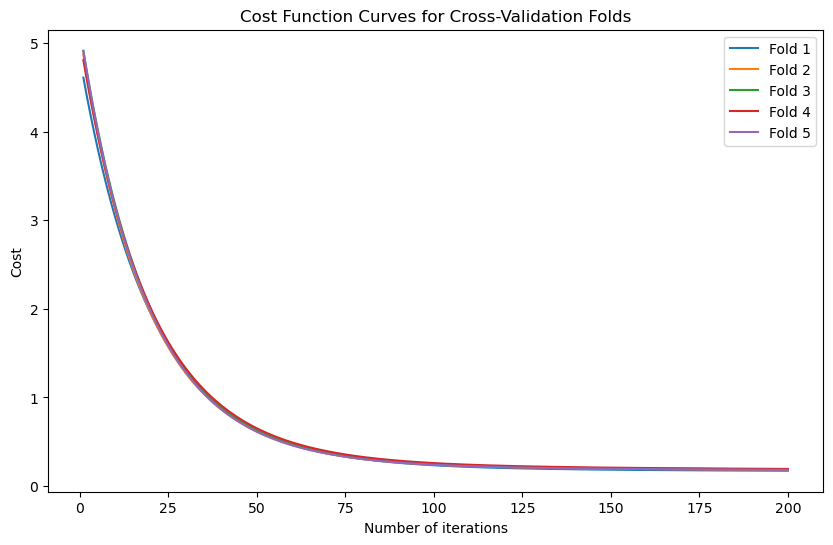

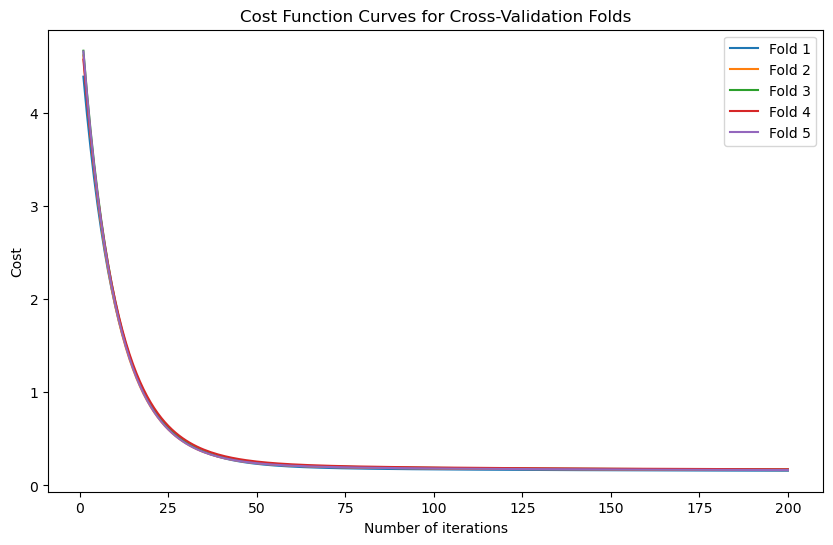

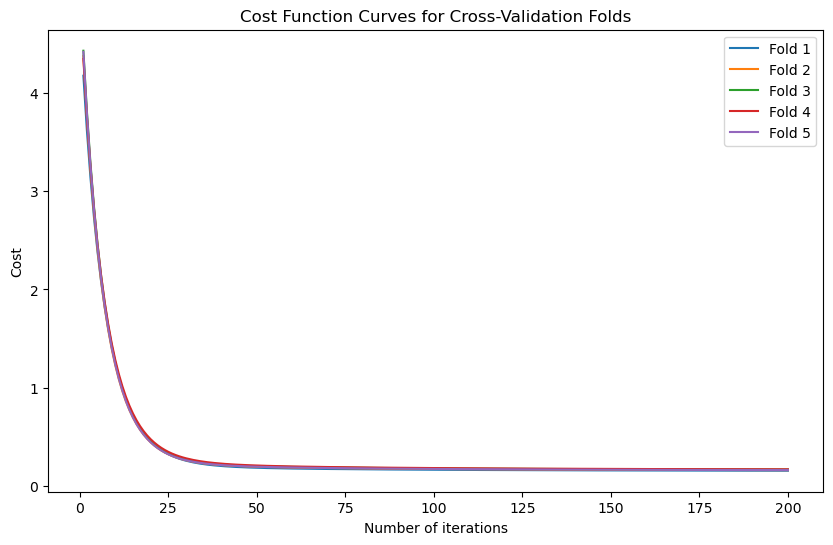

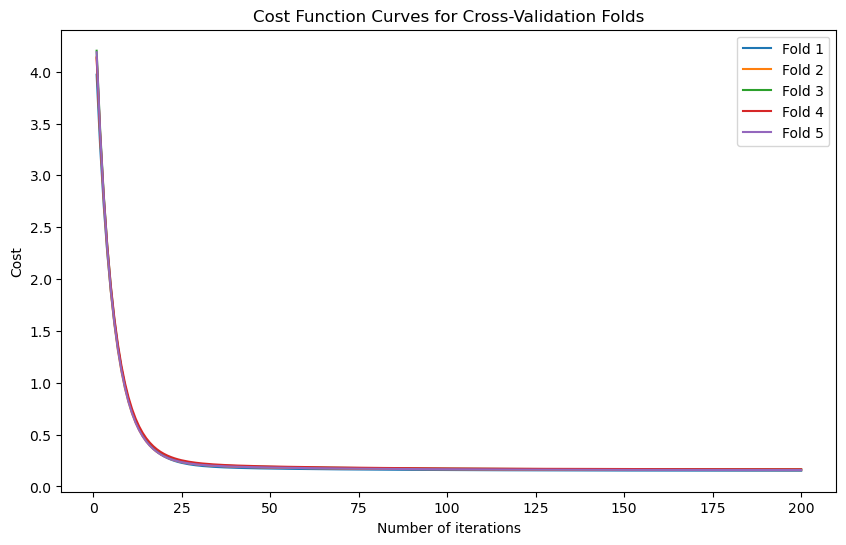

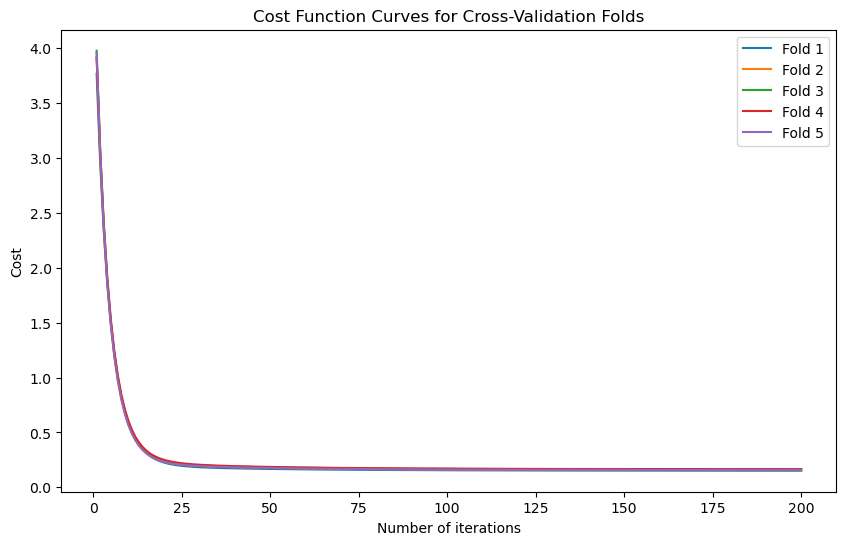

In [13]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
def gradient(X, y, theta):
    m = len(y)
    vectorX = np.c_[np.ones((len(X), 1)), X]
    gradients = 2/m * vectorX.T.dot(vectorX.dot(theta) - np.reshape(y, (len(y), 1)))
    return gradients
def Multivariable_Linear_Regression(X, y, learningrate, iterations):
    y_new = np.reshape(y, (len(y), 1))
    cost_lst = []
    vectorX = np.c_[np.ones((len(X), 1)), X]
    np.random.seed(5)
    theta = np.random.randn(len(X[0]) + 1, 1)
    m = len(X)
    for i in range(iterations):
        gradients = gradient(X, y_new, theta)
        theta = theta - learningrate * gradients
        y_pred = vectorX.dot(theta)
        cost_value = 1 / (2 * len(y)) * ((y_pred - y_new) ** 2)
        total = np.sum(cost_value)
        cost_lst.append(total)
    return cost_lst, theta
def cross_validation(X, y, num_folds, learning_rate, iterations):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    theta_list = []
    cost_curves = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        cost_curve, theta = Multivariable_Linear_Regression(X_train, y_train, learning_rate, iterations)
        theta_list.append(theta)
        cost_curves.append(cost_curve)
    return theta_list, cost_curves
def plot_cost_curves(cost_curves):
    plt.figure(figsize=(10, 6))
    for idx, cost_curve in enumerate(cost_curves):
        plt.plot(np.arange(1, iterations + 1), cost_curve, label=f'Fold {idx + 1}')
    plt.title('Cost Function Curves for Cross-Validation Folds')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()
X = ntrainingset.loc[:, ntrainingset.columns != 'Material Strength'].to_numpy()
y = ntrainingset['Material Strength'].to_numpy()
iterations = 200
num_folds = 5
print("Here, I have plotted the curve for each fold for different learning rate ranging from 0.01 to 0.05.")
for learning_rate in range(1,6):
    learning_rate/=100
    theta_list, cost_curves = cross_validation(X, y, num_folds, learning_rate, iterations)
    plot_cost_curves(cost_curves)

Convergernce criteria in the above gradient descent is dependent upon the maximum number of iterations that is it stops only after completing the maximum number of iterations.

# KNN

In [14]:
print("Here, I have calculated cross validation score for each fold and also their mean. I have calculated these scores for different values of k from 1 to 20.\n")
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
X = ntrainingset.loc[ : , ntrainingset.columns!='Material Strength'].to_numpy()
y = ntrainingset['Material Strength'].to_numpy()
X_train, y_train = X, y
for re in range(1,21):
    knn = KNeighborsRegressor(n_neighbors=re)
    score = cross_val_score(knn, X,y, cv=5)
    print(score)
    print(np.mean(score))

Here, I have calculated cross validation score for each fold and also their mean. I have calculated these scores for different values of k from 1 to 20.

[0.00482876 0.45932926 0.45089658 0.63645186 0.72009788]
0.45432086895126467
[0.23818962 0.56499159 0.34505519 0.69144626 0.76116966]
0.520170461735302
[0.26107491 0.66907987 0.28393632 0.68629753 0.70027418]
0.5201325608368852
[0.25818871 0.69587858 0.33944156 0.69807714 0.68234547]
0.5347862916418068
[0.26608106 0.65594367 0.3060461  0.65939029 0.67542874]
0.5125779717672485
[0.30470623 0.64912994 0.28251446 0.66122004 0.64023259]
0.5075606500820296
[0.30278763 0.63436799 0.28521006 0.64410141 0.63557701]
0.5004088202143044
[0.27511146 0.64410964 0.30130661 0.62924011 0.63132493]
0.4962185497000178
[0.25719957 0.6471139  0.31150753 0.60754503 0.64097359]
0.4928679240053883
[0.24880757 0.64489767 0.30609107 0.61349451 0.61271094]
0.48520035272440865
[0.25085695 0.63444697 0.30017574 0.61545664 0.61444838]
0.4830769355824889
[0.277598

Here I observed that with increase in the value of k, the mse value increases to a certain value then start decreasing.
Its validation accuracy is low compared to the parametric approaches

Pros:
Learning and implementation are simple and intuitive.
It is easy to interpret.
The calculation time is less.

Cons:
The computation cost is quite high.
Difficult to handle high dimensionality.
It requires more memory storage than an effective classifier or supervised learning algorithms.

# Generalized Linear Models

In [15]:
import statsmodels.api as smi
from sklearn.model_selection import KFold
X = ntrainingset.loc[:, ntrainingset.columns != 'Material Strength']
y = ntrainingset['Material Strength']
X = smi.add_constant(X)
folds = 5
f = KFold(n_splits=folds, shuffle=True, random_state=42)
results = []
# using log as a link function
for train_index, val_index in f.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    v = smi.genmod.families.links.Log()
    model = smi.GLM(y_train, X_train, family=smi.families.Gaussian(v))
    result = model.fit()
    results.append(result)
# using identity as a link function
for train_index, val_index in f.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    model = smi.GLM(y_train, X_train, family=smi.families.Gaussian())
    results.append(model.fit())
print("Here value of pseudo R square indicate the measure of goodness of fit of the model. In this case, identity as a link function is giving better fit.\n")
for idx, result in enumerate(results):
    print(f"Fold {idx + 1} Summary:")
    print(result.summary())
    print("=" * 80)

Here value of pseudo R square indicate the measure of goodness of fit of the model. In this case, identity as a link function is giving better fit.

Fold 1 Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:      Material Strength   No. Observations:                  620
Model:                            GLM   Df Residuals:                      611
Model Family:                Gaussian   Df Model:                            8
Link Function:                    Log   Scale:                         0.70688
Method:                          IRLS   Log-Likelihood:                -767.71
Date:                Tue, 14 Nov 2023   Deviance:                       431.91
Time:                        01:14:16   Pearson chi2:                     432.
No. Iterations:                   100   Pseudo R-squ. (CS):             0.3452
Covariance Type:            nonrobust                                         
                         coef    std err     

In [16]:
print("I am using GLM and identity function as a link function because it is giving the maximum pseudo R square value.")
print("Here I had also standarize the test data.")
testset=pd.read_csv("MaterialStrength_test.csv")
testset = pd.DataFrame(preprocessing.scale(testset), columns=testset.columns)
df = pd.DataFrame([1 for i in range(len(testset))],columns=['const'])
testset=pd.concat([df,testset.loc[:, testset.columns != 'Material Strength']], axis=1)
final_output=results[-1].predict(testset.iloc[:,:-1])
final_output.to_csv("12310890_Rahul_Asg1_Test_Output.csv", header=None, index=False)
print("Done")

I am using GLM and identity function as a link function because it is giving the maximum pseudo R square value.
Here I had also standarize the test data.
Done


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:232: RuntimeWarning: Mean of empty slice
  mean_ = np.nanmean(X, axis)
C:\Users\rahul\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:240: RuntimeWarning: Mean of empty slice
  mean_1 = np.nanmean(Xr, axis=0)
C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:259: RuntimeWarning: Mean of empty slice
  mean_2 = np.nanmean(Xr, axis=0)
C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:266: UserWarning: Numeric

In [17]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
y_true = pd.read_csv('Actual Output.csv', header=None, index_col=False)
y_pred = pd.read_csv('12310890_Rahul_Asg1_Test_Output.csv', header=None, index_col=False)
#y_true = pd.DataFrame(preprocessing.scale(y_true))
print(y_pred)
print(y_true)
print(mean_absolute_percentage_error(y_true,y_pred))
print(mean_absolute_error(y_true,y_pred))
print(mean_squared_error(y_true,y_pred))

            0
0   -1.249602
1   -0.891052
2   -0.378762
3   -0.648217
4   -0.221372
..        ...
225  0.455366
226  0.028593
227 -0.421493
228 -0.099598
229 -0.106069

[230 rows x 1 columns]
         0
0    13.71
1    19.69
2    31.65
3    19.11
4    39.58
..     ...
225  44.28
226  31.18
227  23.70
228  32.77
229  32.40

[230 rows x 1 columns]
1.0068783587136967
32.896498442197434
1230.081801137657
